# 특허건수-2차전지지수(KRX K뉴딜지수)

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
from datetime import datetime
import csv # csv 파일 저장
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# 한글폰트 사용
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [3]:
# 2차전지 특허 csv 파일 불러오기
df = pd.read_csv('./data/new_secondary_cell_pluscode_wonoise_re.csv', engine='python')
df

,순서,출원번호,출원일자,출원년월,출원인,발명의명칭,공고일자,공개일자,등록일자,발명자,요약,종목코드
0,1,10-2017-0149717,2017-11-10,2017-11,주식회사 디에이테크놀로지(경기도 화성시 ...),이차전지 셀의 전극리드 성형장치(Lead Bending Machine for Sec...,2019.09.09,2019.05.20,2019.09.03,정영태(경기도 화성시 ...),본 발명은 이차전지의 제조 과정에서 전극조립체의 전극리드를 Z 형태로 2단으로 절곡...,A196490
1,2,10-2018-0092270,2018-08-08,2018-08,주식회사 엘지에너지솔루션(서울특별시 영등포구...),발광물질을 포함하는 리드필름을 구비한 이차전지 및 이차전지의 불량 검사 방법(Sec...,NaN,2020.02.18,NaN,황조연(대전광역시 유성구...),"양극과 음극 사이에 분리막이 개재되어 있는 구조의 전극조립체, 상기 전극조립체의 장...",A051910
2,3,10-2018-0048098,2018-04-25,2018-04,주식회사 엘지에너지솔루션(서울특별시 영등포구...),이차 전지 정압 지그 및 이를 이용한 이차 전지 내부 압력 조절 방법(SECONDA...,2021.06.07,2019.11.04,2021.05.31,윤종건(대전광역시 유성구...)|하회진(대전광역시 유성구...)|이정범(대전광역시 ...,본 발명의 일 실시예에 따른 이차 전지 정압 지그는 전지셀의 양면에 배치되어 상기 ...,A051910
3,14,10-2005-0032926,2005-04-20,2005-04,주식회사 엘지화학(서울특별시 영등포구...),압전 센서가 내장된 이차전지 모듈(Secondary Battery Module Ha...,2009.03.17,2006.10.25,2009.03.11,윤여원(대전광역시 서구...)|정도양(경기도 화성시 ...),"본 발명은 다수의 단위전지가 적층되어 있는 이차전지 모듈에 있어서, 방열을 위한 유...",A051910
4,15,10-2014-0001124,2014-01-06,2014-01,주식회사 엘지화학(서울특별시 영등포구...),금속 코팅된 고분자 집전체를 갖는 케이블형 이차전지(Cable Type Second...,2015.06.22,2014.02.24,2015.06.16,권요한(대전광역시 유성구...)|김기태(대전광역시 유성구...)|김제영(대전광역시 ...,본 발명은 소정 형상의 수평 단면을 가지는 집전체 및 상기 집전체의 표면에 형성된 ...,A051910
...,...,...,...,...,...,...,...,...,...,...,...,...
16832,3247,10-2010-0026181,2010-03-24,2010-03,삼화콘덴서공업주식회사(경기도 용인시 처인구...),전기화학 커패시터용 망간산화물 나노 입자 제조방법(Method for prepari...,2012.11.07,2011.09.30,2012.10.31,오영주(서울특별시 서초구...)|윤중락(경기 용인시 처인구...)|이종협(서울특별시...,본 발명은 상온에서 pH(hydrogen exponent) 조절만을 통하여 높은 정...,A001820
16833,3351,10-2009-0082291,2009-09-02,2009-09,에스케이이노베이션 주식회사(서울특별시 종로구...),에틸렌 공중합체 및 이의 제조방법(Ethylene copolymer and a me...,2012.06.05,2010.03.22,2012.05.25,신대호(대전광역시 유성구...)|심춘식(대전광역시 유성구...)|정지수(대전광역시 ...,"본 발명은 에틸렌 공중합체 및 이의 제조방법에 관한 것으로, 구체적으로는 직렬 또는...",A096770
16834,3589,10-2007-0104105,2007-10-16,2007-10,에스케이이노베이션 주식회사(서울특별시 종로구...) and 한국과학기술원(대전광역시...,전압 센서와 전하 균일 장치가 결합된 배터리 운용 시스템(Battery Manage...,2012.01.25,2009.04.21,2012.01.13,문건우(대전광역시 유성구...)|박홍선(대전광역시 유성구...)|김철호(대전광역시 ...,본 발명의 배터리 운용 장치는 직렬 연결된 복수개의 배터리로 구성된 배터리 모듈; ...,A096770
16835,3592,10-2007-0096477,2007-09-21,2007-09,주식회사 엘지화학(서울특별시 영등포구...),광학필름 및 이의 제조방법(OPTICAL FILMS AND METHOD FOR FA...,2011.01.19,2009.03.25,2011.01.13,강병일(대전 유성구...)|한창훈(대전 유성구...)|이대우(부산 사하구...)|서...,"본 발명은 i) 아크릴계 수지, 및 ii) 코어-쉘 타입의 그라프트 공중합체로서, ...",A051910


In [4]:
# 15-01이전 일자 삭제
index = df[df['출원년월'] < '2015-01'].index
df_15 = df.drop(index)
df_15

,순서,출원번호,출원일자,출원년월,출원인,발명의명칭,공고일자,공개일자,등록일자,발명자,요약,종목코드
0,1,10-2017-0149717,2017-11-10,2017-11,주식회사 디에이테크놀로지(경기도 화성시 ...),이차전지 셀의 전극리드 성형장치(Lead Bending Machine for Sec...,2019.09.09,2019.05.20,2019.09.03,정영태(경기도 화성시 ...),본 발명은 이차전지의 제조 과정에서 전극조립체의 전극리드를 Z 형태로 2단으로 절곡...,A196490
1,2,10-2018-0092270,2018-08-08,2018-08,주식회사 엘지에너지솔루션(서울특별시 영등포구...),발광물질을 포함하는 리드필름을 구비한 이차전지 및 이차전지의 불량 검사 방법(Sec...,NaN,2020.02.18,NaN,황조연(대전광역시 유성구...),"양극과 음극 사이에 분리막이 개재되어 있는 구조의 전극조립체, 상기 전극조립체의 장...",A051910
2,3,10-2018-0048098,2018-04-25,2018-04,주식회사 엘지에너지솔루션(서울특별시 영등포구...),이차 전지 정압 지그 및 이를 이용한 이차 전지 내부 압력 조절 방법(SECONDA...,2021.06.07,2019.11.04,2021.05.31,윤종건(대전광역시 유성구...)|하회진(대전광역시 유성구...)|이정범(대전광역시 ...,본 발명의 일 실시예에 따른 이차 전지 정압 지그는 전지셀의 양면에 배치되어 상기 ...,A051910
18,50,10-2018-0123410,2018-10-16,2018-10,주식회사 엘지에너지솔루션(서울특별시 영등포구...),이차전지 셀 에이징 장치 및 에이징 방법(aging apparatus and mot...,NaN,2020.04.24,NaN,배동훈(대전광역시 유성구...)|박효진(대전광역시 유성구...)|배준성(대전광역시 ...,본 발명은 이차전지 셀 에이징 장치를 개시한다. 본 발명의 일 측면에 따른 이차전지...,A051910
21,57,10-2019-0112728,2019-09-11,2019-09,주식회사 디에이테크놀로지(경기도 화성시 ...),이차전지 셀 제조용 전극 픽앤플레이스 장치 및 방법(Picking-up And Pl...,2021.05.27,2021.03.19,2021.05.20,강전영(경기도 화성...)|김영곤(경기도 여주시 소양로번길...)|김경호(경기도 안...,본 발명은 복수의 픽커노즐로 전극을 진공 흡착하여 이송한 후 작업테이블에 전달할 때...,A196490
...,...,...,...,...,...,...,...,...,...,...,...,...
16817,822,10-2016-0121633,2016-09-22,2016-09,주식회사 엘지화학(서울특별시 영등포구...),"담체-나노입자 복합체, 이의 제조방법, 및 이를 포함하는 막전극 접합체(CARRIE...",2019.11.19,2017.04.04,2019.11.13,조준연(대전광역시 유성구...)|김상훈(대전광역시 유성구...)|황교현(대전광역시 ...,"본 명세서는 담체-나노입자 복합체, 이의 제조방법, 및 이를 포함하는 막전극 접합체...",A051910
16818,896,10-2015-0103215,2015-07-21,2015-07,주식회사 엘지화학(서울특별시 영등포구...),화합물 반도체 열전 재료 및 그 제조방법(Compound semiconductor ...,2019.07.05,2017.02.02,2019.07.01,권오정(대전광역시 유성구...)|최현우(대전광역시 유성구...)|임병규(대전광역시 ...,"우수한 파워 팩터 및 ZT 값을 가짐으로써 열전 변환 성능이 우수하며, 특히 저온에...",A051910
16819,1108,10-2016-0005323,2016-01-15,2016-01,주식회사 엘지화학(서울특별시 영등포구...),폴리이미드 전구체 조성물 및 이로부터 제조된 투명 폴리이미드 필름(POLYIMIDE...,2019.10.18,2017.07.25,2019.09.03,윤철민(대전광역시 유성구...)|김경준(대전광역시 유성구...),본 발명은 디암모늄염을 포함하는 폴리이미드 전구체 조성물에 모노아민계 첨가제를 더 ...,A051910
16820,1122,10-2015-0179944,2015-12-16,2015-12,주식회사 엘지화학(서울특별시 영등포구...),폴리이미드 전구체 조성물 및 이로부터 제조된 투명 폴리이미드 필름(POLYIMIDE...,2019.10.18,2017.06.26,2019.09.03,윤철민(대전광역시 유성구...)|김경준(대전광역시 유성구...),"본 발명은 디암모늄염을 포함하는 폴리이미드 전구체 조성물을 제공함으로써, 일반적인 ...",A051910


In [5]:
# column명 변경(2015-01  이후)
df_15.rename(columns = {'출원년월':'월별'}, inplace=True)

# column명 변경(전체)
df.rename(columns = {'출원년월':'월별'}, inplace=True)

In [6]:
# '월별'로 특허개수를 count한 데이터 프레임(2015-01 이후)
df_count = df_15.groupby(['월별']).count()
df_count = pd.DataFrame(df_count['출원번호'])

# '월별'로 특허개수를 count한 데이터 프레임(전체)
df_count2 = df.groupby(['월별']).count()
df_count2 = pd.DataFrame(df_count2['출원번호'])


# column명 변경(2015-01 이후)
df_count.rename(columns = {'출원번호':'특허개수'}, inplace=True)
# column명 변경(전체)
df_count2.rename(columns = {'출원번호':'특허개수'}, inplace=True)
# index 초기화
df_count2.reset_index(inplace=True)

In [7]:
# 2차전지 지수 csv 파일 불러오기
df_1 = pd.read_csv(f'./data/2차전지지수_DataSet_20150102.csv', engine='python')
df_1

,일자,월별,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,월별 평균종가
0,2015-01-02,2015-01,1000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1014.863333
1,2015-01-05,2015-01,985.34,-14.66,-1.47,NaN,NaN,NaN,NaN,NaN,NaN,1014.863333
2,2015-01-06,2015-01,949.62,-35.72,-3.63,NaN,NaN,NaN,NaN,NaN,NaN,1014.863333
3,2015-01-07,2015-01,946.38,-3.24,-0.34,NaN,NaN,NaN,NaN,NaN,NaN,1014.863333
4,2015-01-08,2015-01,966.28,19.90,2.10,NaN,NaN,NaN,NaN,NaN,NaN,1014.863333
...,...,...,...,...,...,...,...,...,...,...,...,...
1657,2021-09-28,2021-09,6419.86,4.25,0.07,6442.43,6457.56,6329.02,7517.0,1782063.0,186942442.0,6161.327368
1658,2021-09-29,2021-09,6436.78,16.92,0.26,6304.77,6444.19,6274.18,8342.0,2044538.0,187119598.0,6161.327368
1659,2021-09-30,2021-09,6447.22,10.44,0.16,6393.50,6464.66,6327.46,8484.0,1985004.0,188226567.0,6161.327368
1660,2021-10-01,2021-10,6389.76,-57.46,-0.89,6421.44,6455.34,6334.56,4634.0,1149764.0,186641979.0,6335.185000


In [8]:
# '월별 평균종가'를 구성한 데이터 프레임
df_mean = df_1.groupby('월별')['종가'].agg(**{'월별 평균종가':'mean'}).reset_index()
df_mean

,월별,월별 평균종가
0,2015-01,1014.863333
1,2015-02,1142.924118
2,2015-03,1181.204091
3,2015-04,1266.055455
4,2015-05,1252.776667
...,...,...
77,2021-06,5794.975909
78,2021-07,6136.429091
79,2021-08,6158.736190
80,2021-09,6161.327368


In [12]:
#'월별'로 특허개수를 count한 데이터 프레임(2018-10 이후)과 월별 평균종가'를 구성한 데이터 프레임을 merge
df_merge = pd.merge(df_count, df_mean, how='outer', on='월별')
# NaN 값은 0으로 대체
df_merge.fillna(0,inplace=True)
df_merge

,월별,특허개수,월별 평균종가
0,2015-01,118.0,1014.863333
1,2015-02,83.0,1142.924118
2,2015-03,112.0,1181.204091
3,2015-04,105.0,1266.055455
4,2015-05,98.0,1252.776667
...,...,...,...
77,2021-06,5.0,5794.975909
78,2021-07,8.0,6136.429091
79,2021-08,6.0,6158.736190
80,2021-09,5.0,6161.327368


In [10]:
# 데이터프레임 저장 (.gz를 통해 압축저장 가능)
df_merge.to_csv(f'./월별 특허-2차전지지수(2015-01).csv', index=False, encoding='utf-8-sig')
# 데이터프레임 저장 (.gz를 통해 압축저장 가능)
df_count2.to_csv(f'./월별 특허-2차전지지수(전체).csv', index=False, encoding='utf-8-sig')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


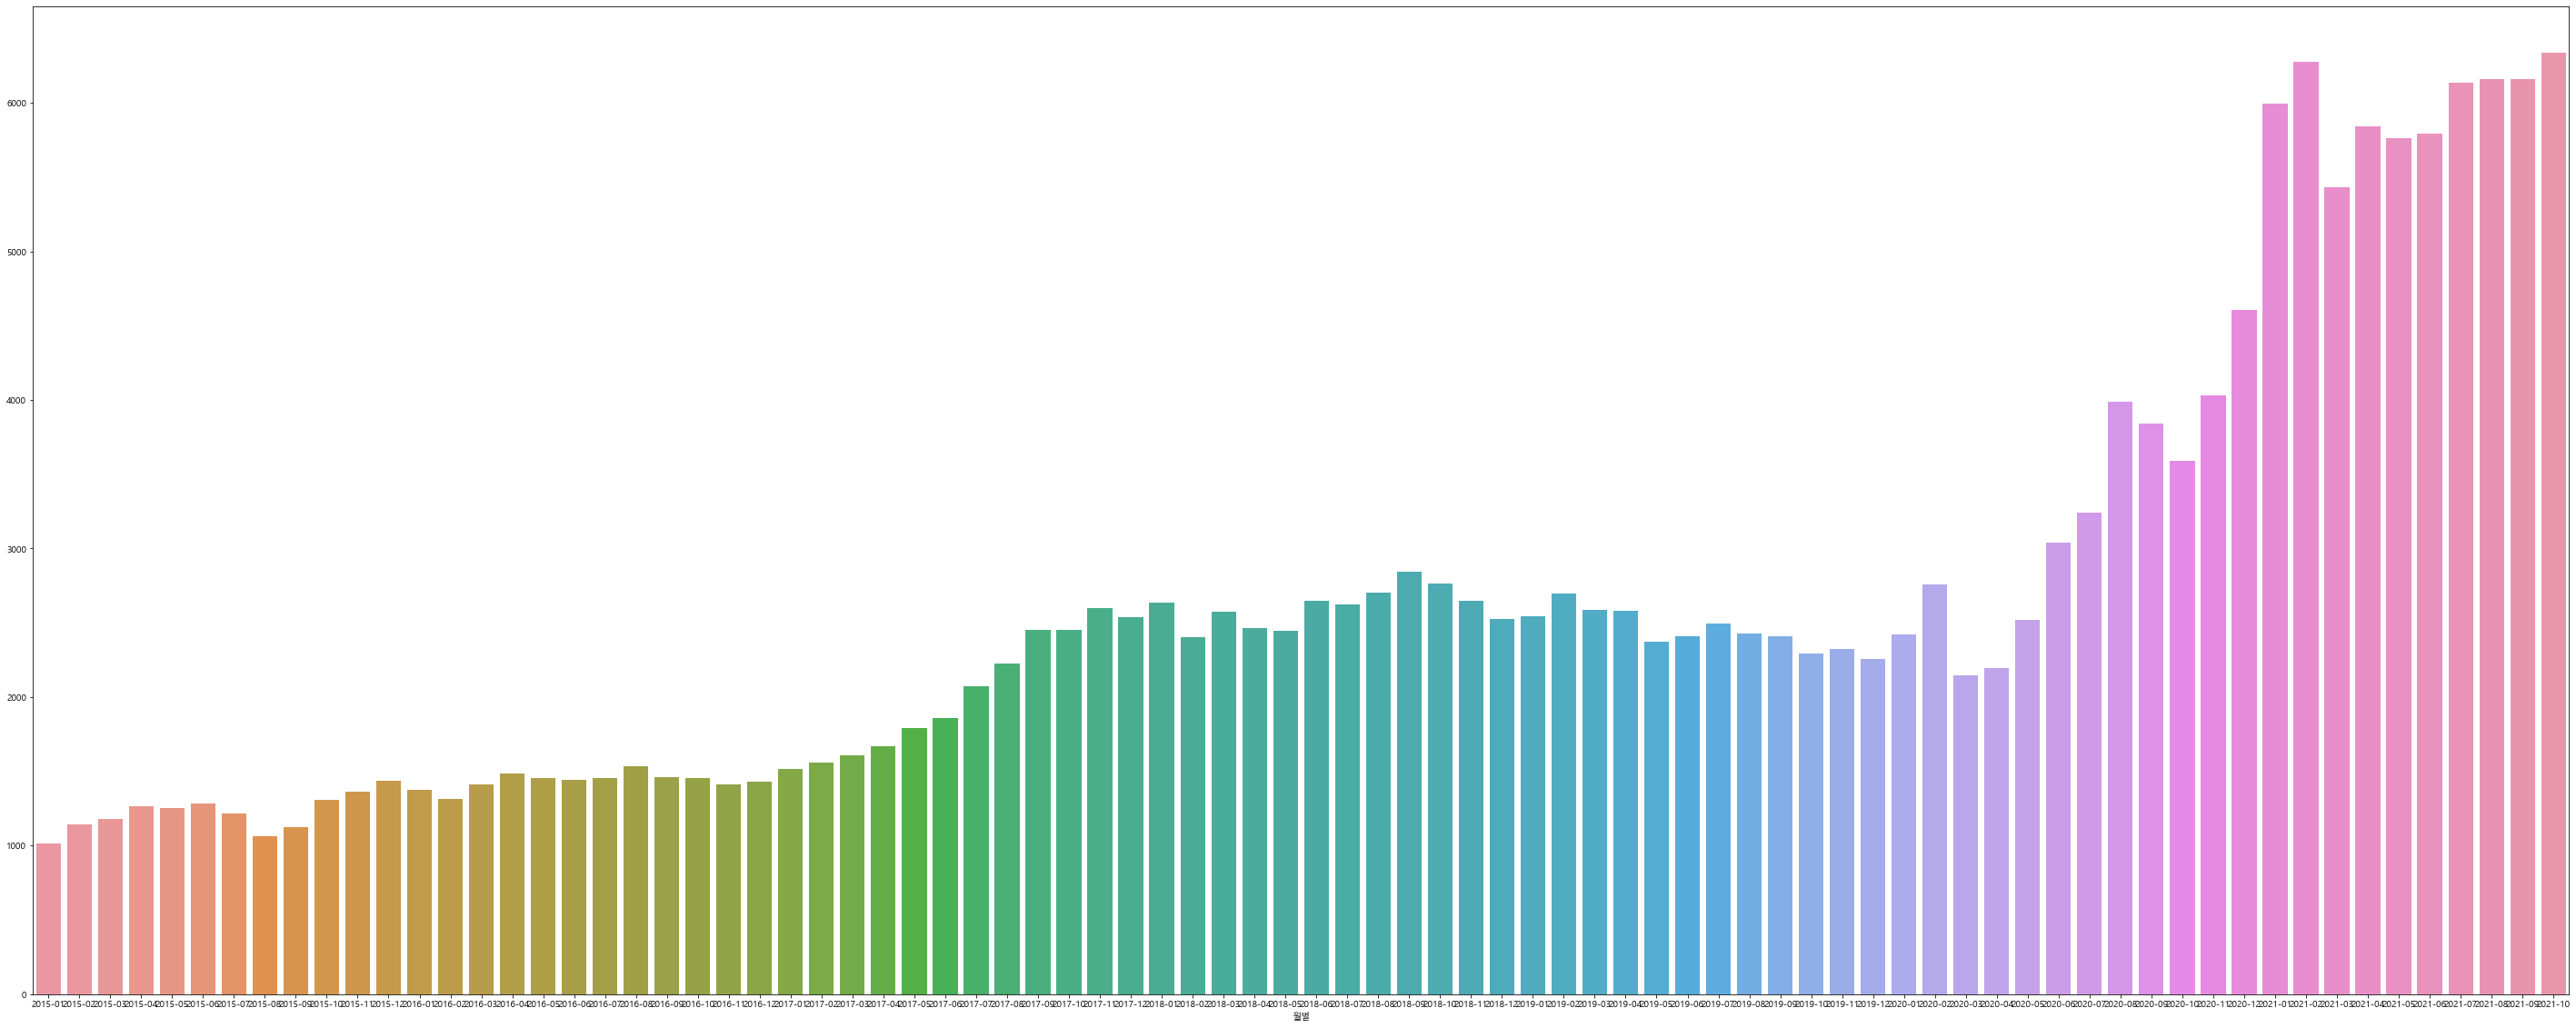

In [15]:
# 시각화 (월별(2015-01 이후) - 2차전지 지수)
fig = plt.figure(figsize=(50, 20))
# plt.bar(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
sns.barplot(df_merge['월별'], df_merge['월별 평균종가'].values)
plt.show()
fig.savefig('./월별(2015-01 이후)_2차전지 지수.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


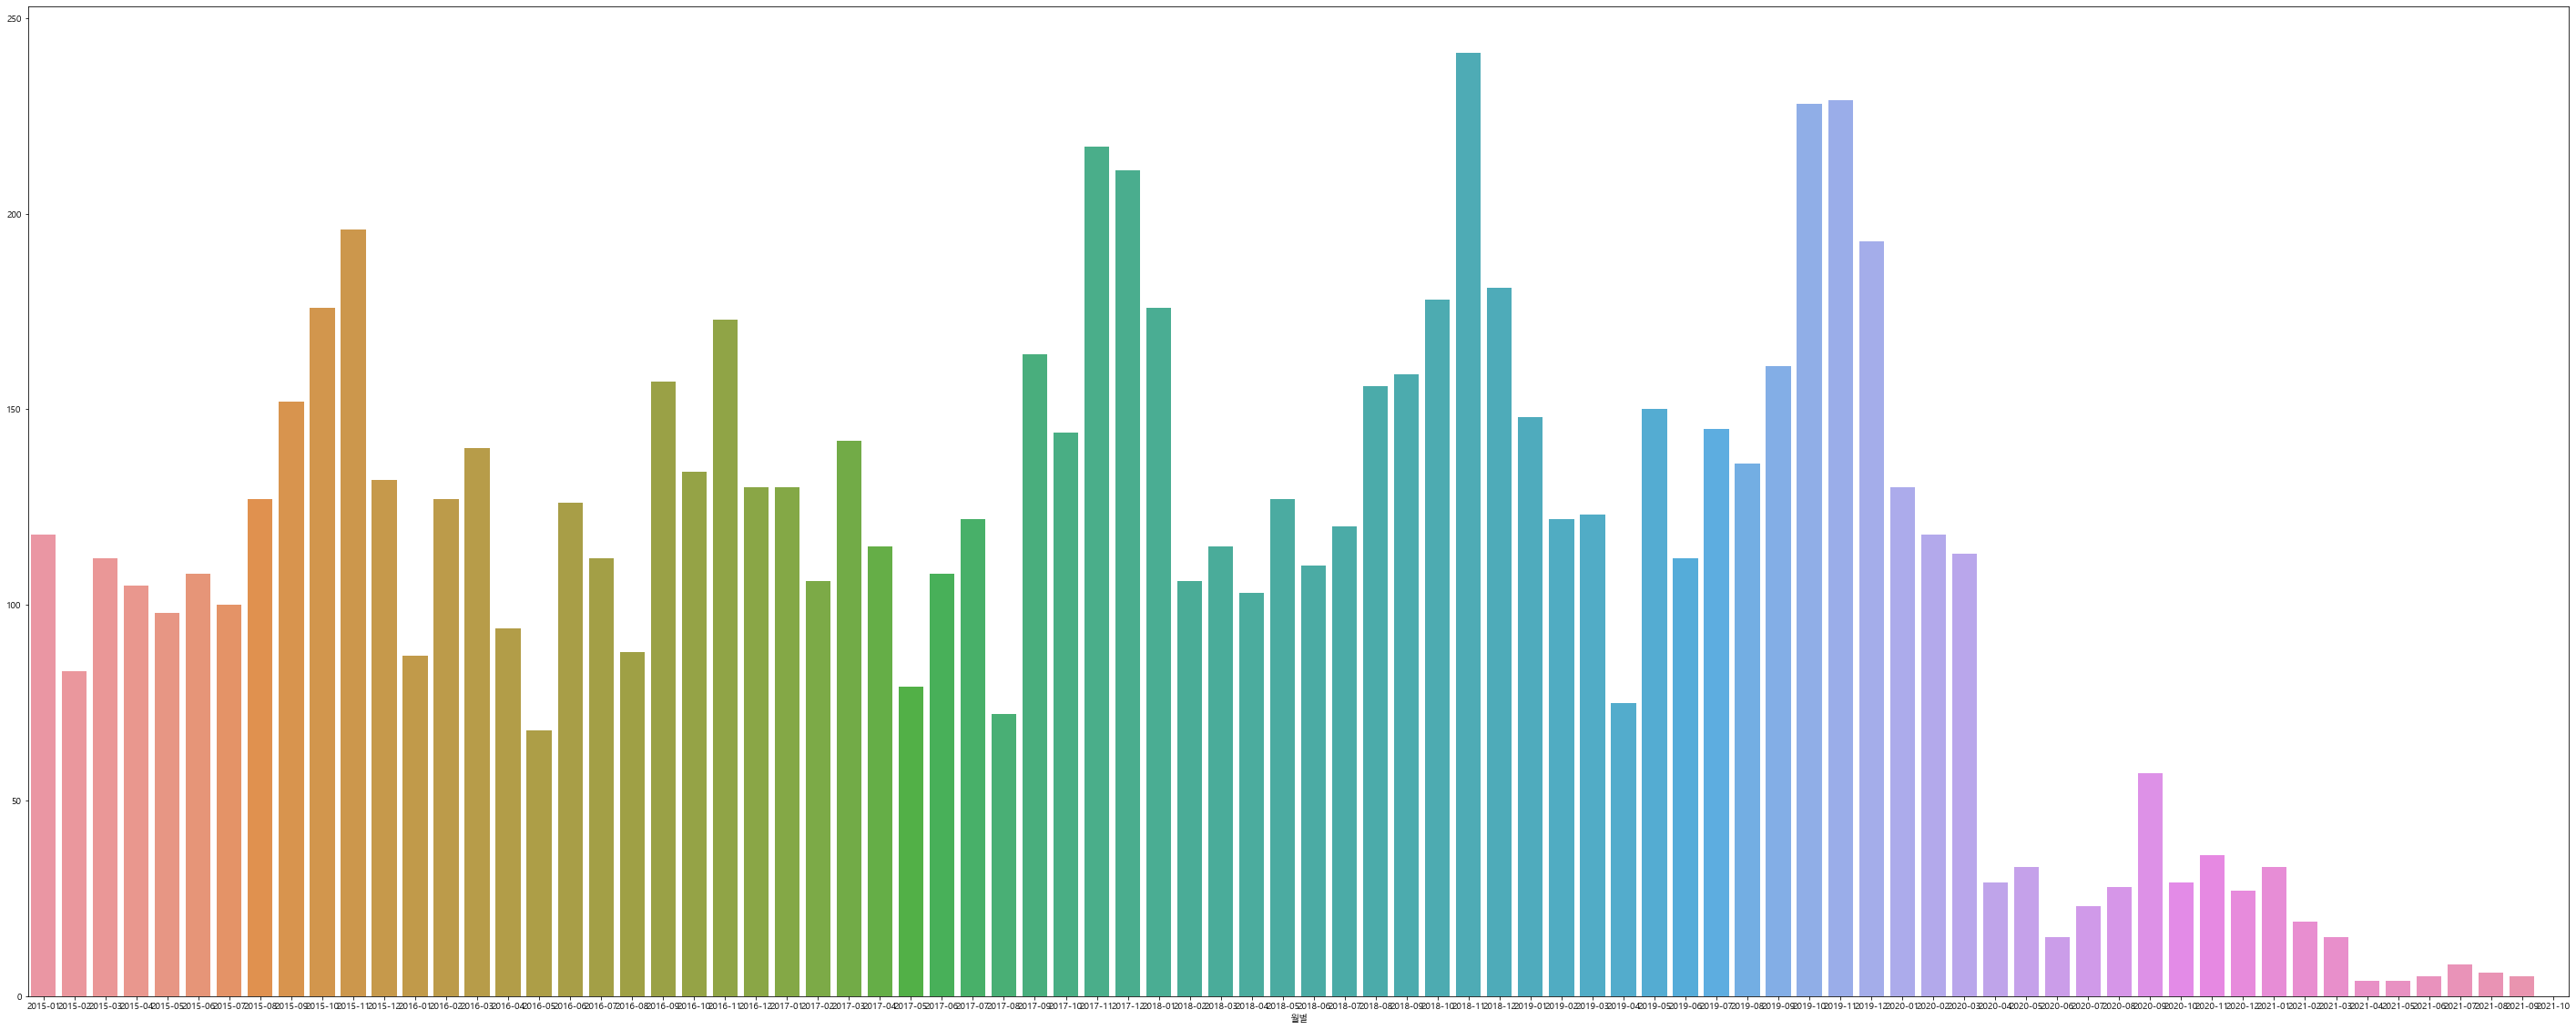

In [16]:
# 시각화 (월별(2015-01 이후) - 특허개수)
fig = plt.figure(figsize=(50, 20))
sns.barplot(df_merge['월별'], df_merge['특허개수'].values)
plt.show()
fig.savefig('./월별(2015-01 이후)_특허개수.png')

<ipython-input-14-a72f702e3956>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot()


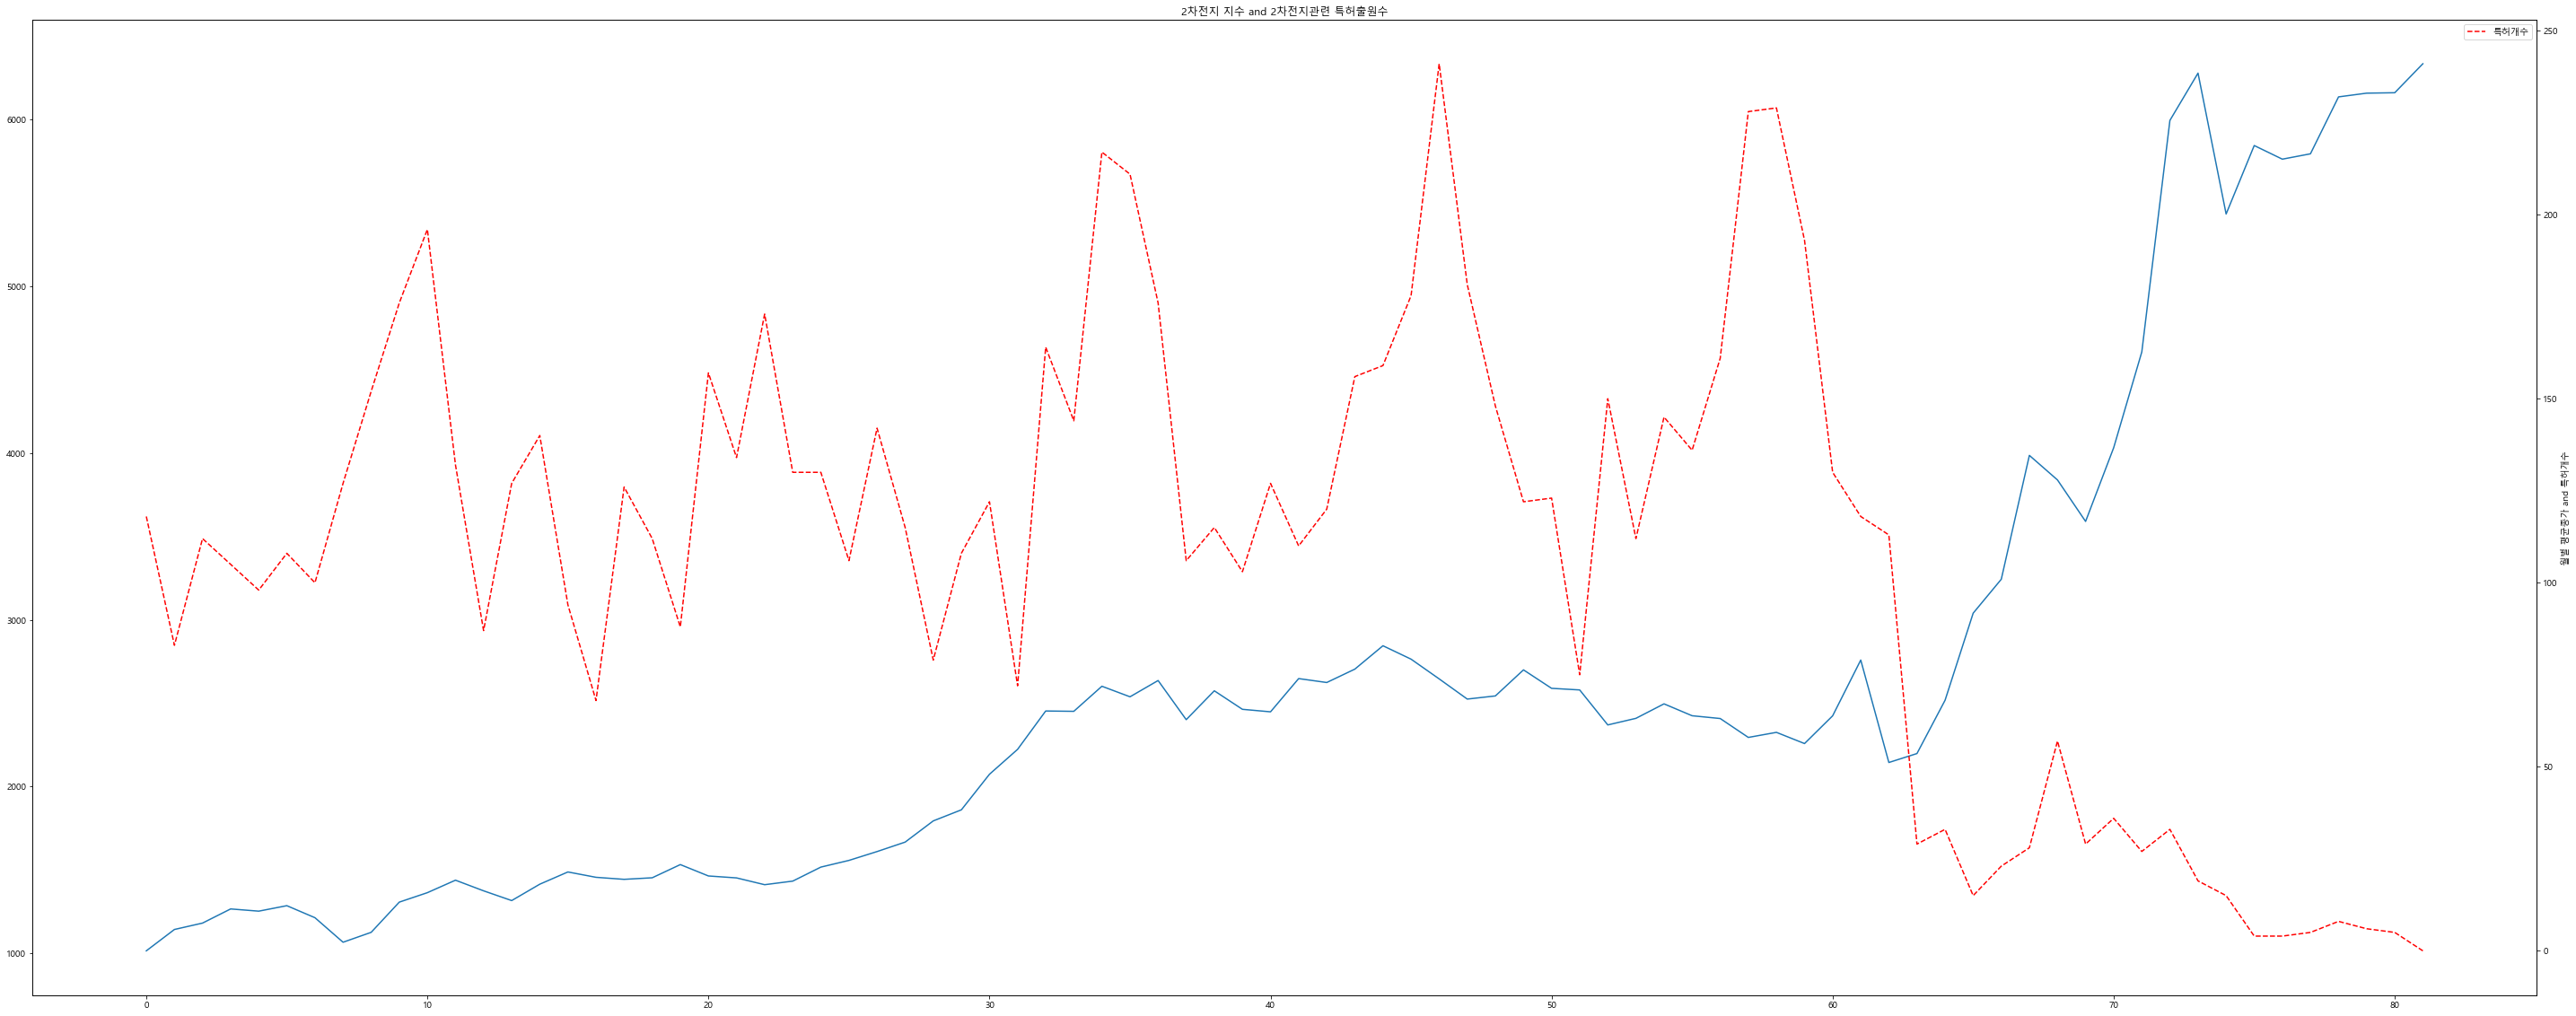

In [14]:
# 이중 Y축을 이용한 시각화 (2차전지 지수 - 특허개수)
fig = plt.figure(figsize=(50, 20))
plt.title('2차전지 지수 and 2차전지관련 특허출원수')
x = df_merge['월별'].index
y_1 = df_merge['월별 평균종가'].values
y_2 = df_merge['특허개수'].values

ax1 = plt.subplot()
ax1.plot(x, y_1, label='월별 평균종가')

ax2 = ax1.twinx()
ax2.plot(x, y_2, 'r--', label='특허개수')

plt.ylabel('월별 평균종가 and 특허개수')
plt.xlabel('기준 월')
plt.legend(loc='best')
plt.show()
fig.savefig('./data/2차전지 지수 월별 평균종가-2차전지관련 특허개수.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


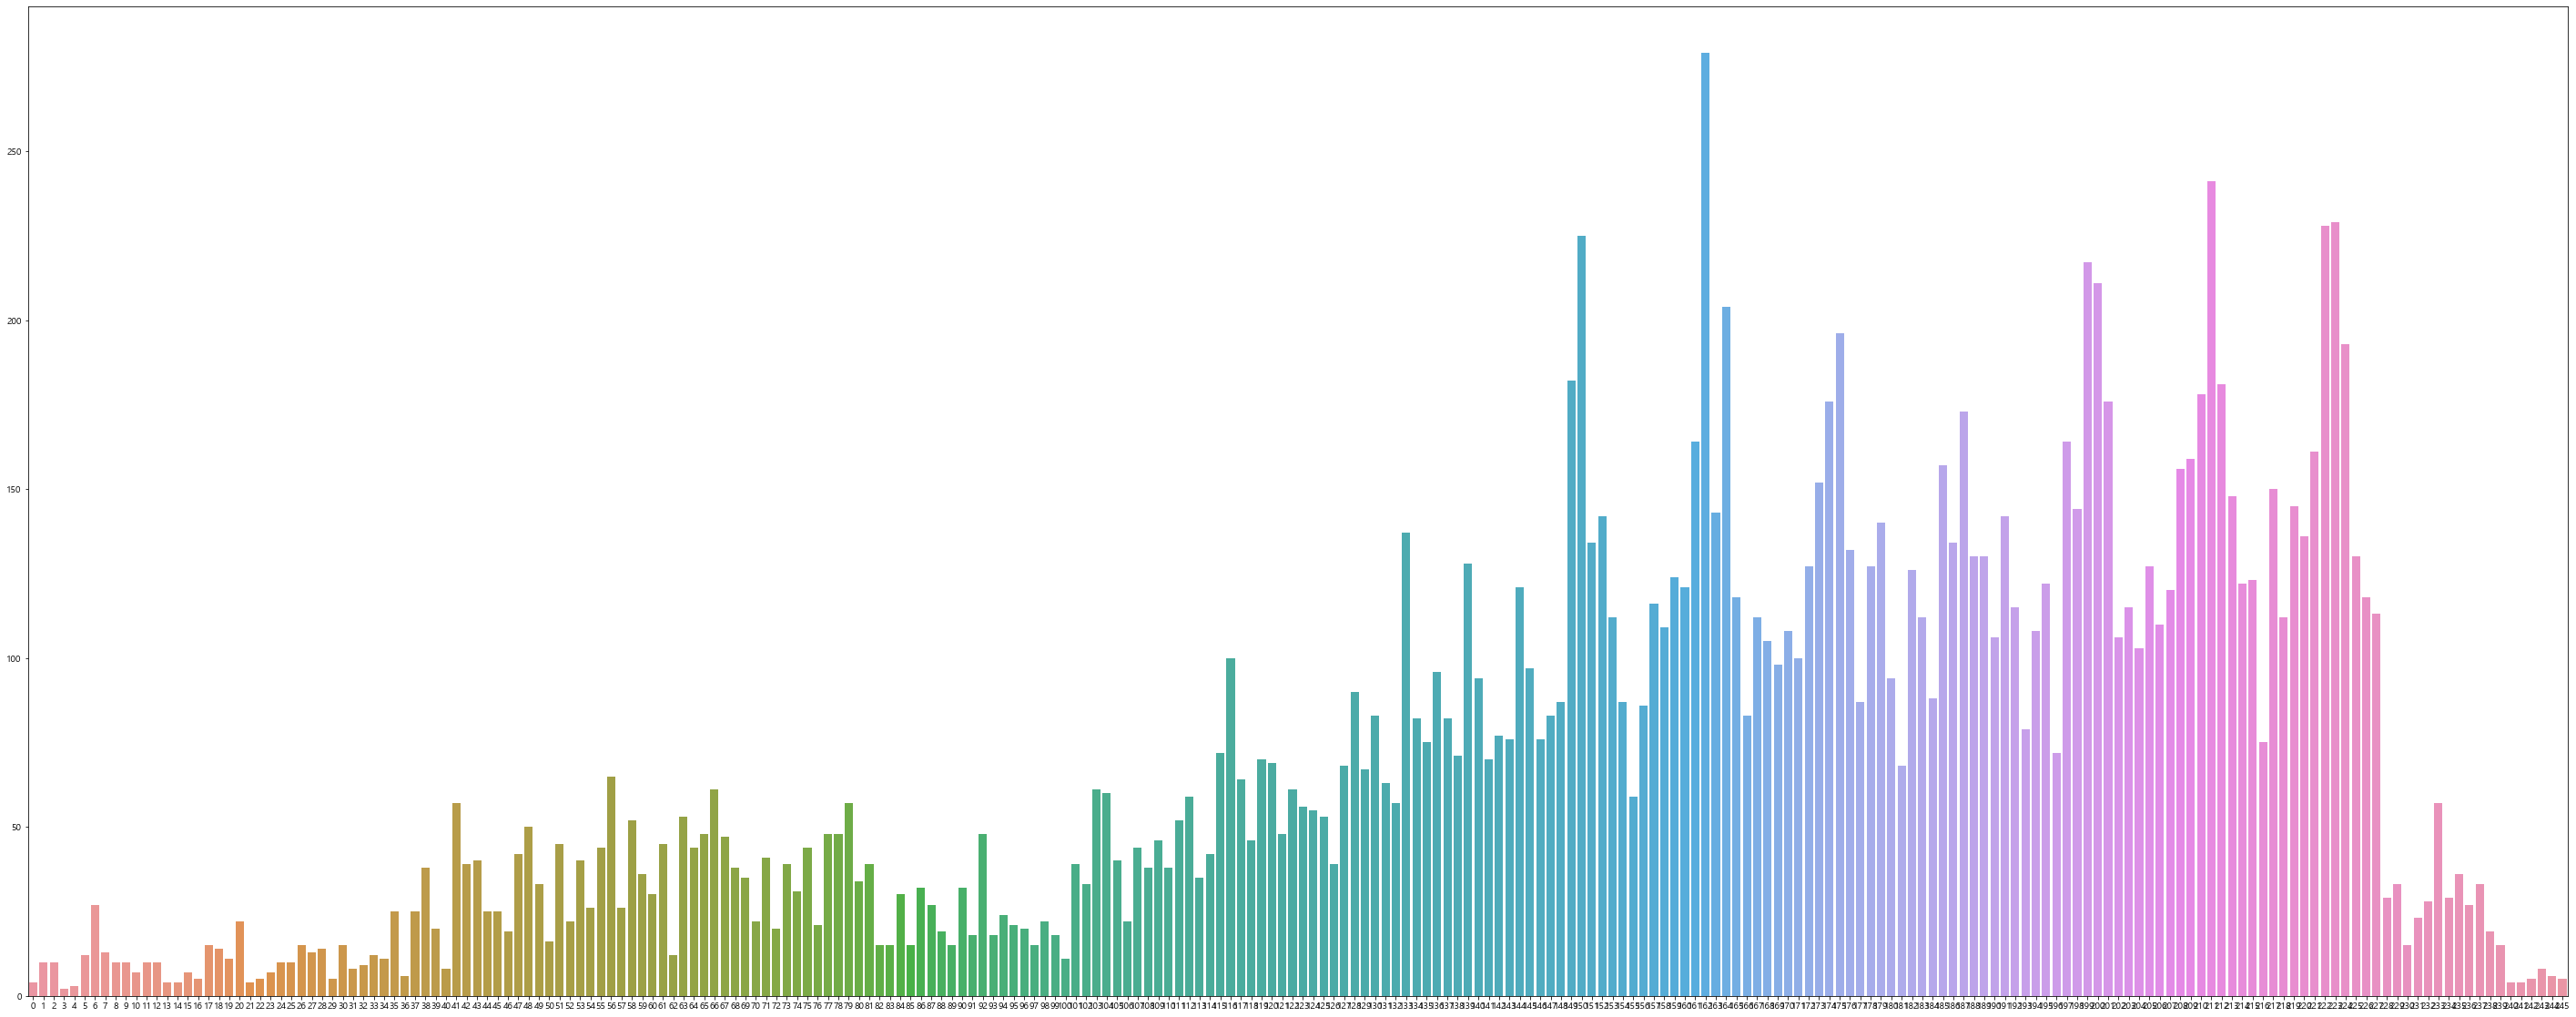

In [17]:
# 시각화 (월별(전체) - 특허개수)
fig = plt.figure(figsize=(50, 20))
sns.barplot(df_count2['월별'].index, df_count2['특허개수'].values)
plt.show()
fig.savefig('./월별(전체)_특허개수.png')